# <font color='blue'>ASTR 21100</font> 

# <font color='blue'>"Computational Techniques in Astrophysics"</font>

# <font color='blue'>Methods for sampling from 1-dimensional probability distributions</font>


In [1]:
import numpy as np 
from timeit import default_timer

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plotting import plot_prettier, plot_2d_dist, plot_color_map
plot_prettier()

### <font color='blue'>Sampling random numbers from a 1-dimensional probability distribution function (pdf)</font>

Such sampling involves two steps: 

1) a sequence of random, uniformly distributed numbers in the $[0,1]$ interval (this is handled by PRNG codes, see <a href="https://drive.google.com/file/d/1x3KUR8vqs-O7DDqJYUaT-0xA8x6Yh5oK/view?usp=sharing"><tt>08b_prngs.ipynb</tt></a>)

2) a transformation of that sequence from the uniform pdf to a desired (target) pdf.

### <font color='blue'>Definitions of the pdf and cdf</font>

* **Probability distribution function (pdf)** (sometimes called probability density function), $p(x)$, is a ***positive*** function, $p(x)\geq 0$, defined such that $p(x)dx$ measures probability for $x$ to be in the interval $[x,x+dx)$. 

If pdf is defined on an interval $x\in [a,b]$, integral over this interval for a properly normalized pdf is 

$$\int\limits_a^b p(x)dx=1$$

because probability of any $x$ should be 1 by definition. So pdf is always 0 or positive and normalized such that integral over the interval for which it is defined is equal to 1.


* **Cumulative distribution function (cdf)** is defined as 

$$P(x) = \int\limits_b^x p(x^\prime) dx^\prime.$$
If $p(x)\geq 0$ and is normalized as above, it is clear that $P$ varies ***monotonically*** from $0$ to $1$, as $x$ increases from the lower to the upper limits of the interval on which $p(x)$ is defined. 

**Note 1.** Whether pdf must be so normalized depends on its application. If we need only ratios such as $p(x_2)/p(x_1)$ then normalization is not relevant. Thus, for certain methods, such as MCMC normalization is not important.  

**Note 2.** Given that $p(x)dx$ is probability, which is dimensionless, if $x$ has some dimension (for example, grams), then $p(x)$ also must have dimension of $[x^{-1}]$ (i.e., inverse grams) so that product of $p(x)$ and $dx$ is dimensionless. Remembering that pdf has dimensions inverse of the dimension of its parameter is useful when algebraic operations with pdfs are performed, as we will see later. 

### <font color='blue'> Inverse transform sampling (ITS) method</font>

For a sample of $x_i$ values drawn from $p(x)$ pdf which has cdf $P(x)$, we expect that $y_i = P(x_i)$ are uniformly distributed in $y\in [0,1]$. 

This method uses this statement in the reverse order: if I have samples $y_i$ drawn from the uniform pdf defined in $y\in [0,1]$, then $x_i$ values defined by equation 

$$y_i=P(x_i)$$

will follow $p(x)$ pdf. That's all there is to this method. All we need to handle is how to solve this equation for $x_i$ values. 


### <font color='blue'> Illustration: sampling from $p(x)=e^{-x}$ defined at $x\in [0,\infty)$</font>


In [2]:
def pdf_exp(x, beta=1.):
    return beta*np.exp(-beta*x)

def cdf_exp(x, beta=1.):
    return 1.-np.exp(-beta*x)

def cdf_exp_inv(x, beta=1):
    return -beta*np.log(np.maximum(2e-17,1-x))


In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec

plot_prettier()

In [4]:
def its_demo(figsize=(3,3), xlims=[0,7], cdf=None, cdfi=None, nl=10):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'cdf   $P(x)$')
    ax.set_xlim(xlims)
    ax.set_ylim(0, 1)
    x = np.linspace(xlims[0], xlims[1],100)
    ax.plot(x, cdf(x), lw=2, c='slateblue', label='cdf')
    yl = np.linspace(0.,1., nl)
    xl = cdfi(yl)
    for i in range(nl):
        ax.plot([0, xl[i]], [yl[i], yl[i]], ls='--', c='gray', lw=0.5)
        ax.plot([xl[i], xl[i]], [0, yl[i]], ls='--', c='gray', lw=0.5)
    #ax.legend(frameon=False, loc='lower right')
    plt.show()



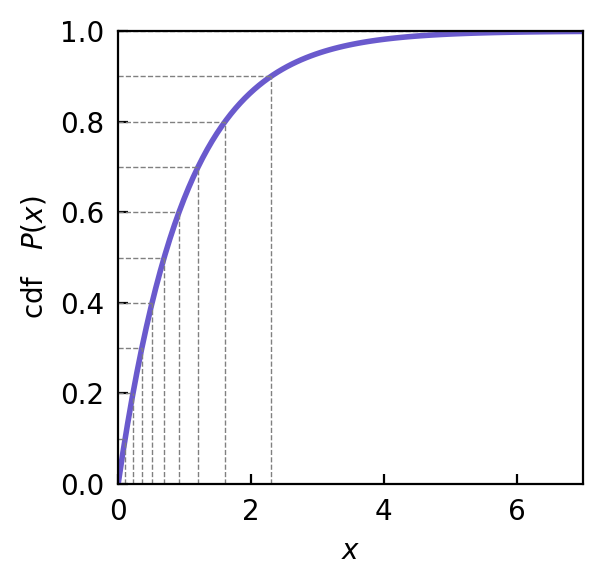

In [5]:
its_demo(cdf=cdf_exp, cdfi=cdf_exp_inv, nl=11)

In the plot above, if random cdf values are drawn from a uniform pdf, they have equal probability to fall within any segment between horizonthal dashed lines. However, the smaller numbers (closer to 0) get converted into smaller intervals of $x$ compared to larger values of the cdf. Note that there is the same number of intervals between horizonthal and vertical lines. 

Obviously the *probability* to fall within each interval along $y$ or $x$ axis is exactly the same. Given that we are drawing random $y$ values from the uniform pdf, the probability for a draw to fall within any of the intervals is the same. However, the probability *density* is different, because it is equal to probability divided by the length of the interval. 

The length of the interval along $y$ axis is constant (let's denote it $dy$) and probability to fall within a given interval  along $y$ axis is also constant and is equal to $1\times dy=dy$, because we are drawing random numbers from the uniform pdf defined on the interval $y\in [0,1]$, so it is $u(y)=1$ in the interval and 0 outside, within $[0,1]$ probability for $y$ to fall within $[y,y+dy]$ is $p(y)dy=dy$. This is also the probability for $x$ to fall within the corresponding interval along $x$ axis with length $dx$, and the pdf along $x$ is thus $dy/dx$. But $y$ is the cdf $y=P(x)$ and its derivative with respect to $x$ is pdf $p(x)$: 

$$P(x) = \int\limits_b^x p(x)dx\ \ \ \rightarrow\ \ \ \ P^\prime(x)=\frac{dy}{dx}=p(x).$$


An animation demo showing how sampling from uniform distribution along $y$ axis and which represent cdf values are converted to $x$ values via inverse of the cdf. Graphically, this corresponds to a horizonthal line at a given sampled $y$ value to the cdf curve, and then vertical line at the $x$ value at which horizonthal line intersects cdf. 

<IPython.core.display.Javascript object>


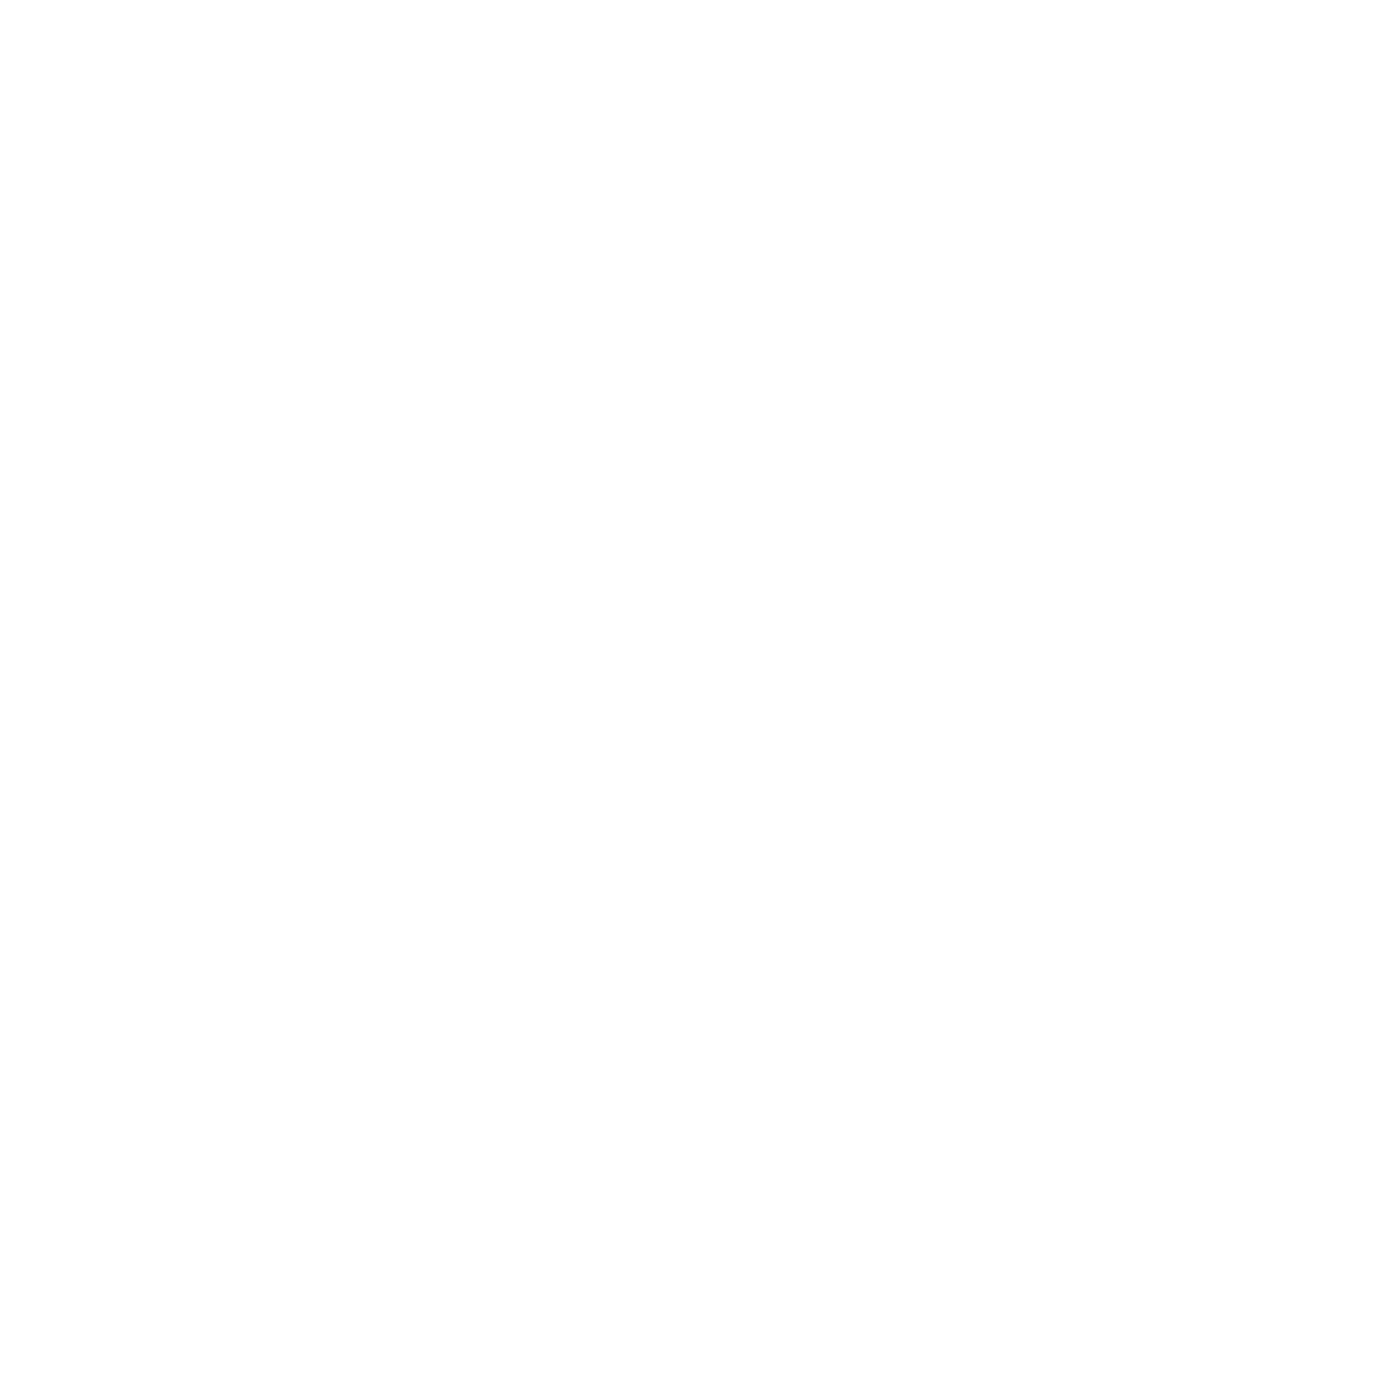

In [6]:
%matplotlib notebook

nr = 1000 # size of the random sample
d = np.random.uniform(size=nr)
xlims=[0,7] # limits of the x-axis
cdf = cdf_exp # set specific cdf, its inverse, and pdf functions
cdfi = cdf_exp_inv
pdf = pdf_exp

fig = plt.figure(figsize=(4,4))
gs = GridSpec(8,9, wspace=1, hspace=1)
ax_l = fig.add_subplot(gs[:6,:2])
ax = fig.add_subplot(gs[:6,2:])
ax_b = fig.add_subplot(gs[6:,2:])
#ax_l.axes.yaxis.set_visible(False)
ax_l.axes.xaxis.set_visible(False)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax_b.axes.yaxis.set_visible(False)

ax.set_xlim(xlims)
ax.set_ylim(0, 1)
ax_b.set_xlim(xlims)
ax_l.set_ylim(0.,1)
x = np.linspace(xlims[0], xlims[1],100)
ax.plot(x, cdf(x), lw=2, c='slateblue', label='cdf')
ax.legend(frameon=False, loc='lower right')
ax_b.set_xlabel('$x$')

def its_anim(i, savefig=False):
    ci = cdfi(d[i])
    di = d[i]

    ax.lines.remove(its_anim.l1)
    ax.lines.remove(its_anim.l2)
    ax.plot(ci, 0., '|k', ms=15, markeredgewidth=0.75)
    its_anim.l1, = ax.plot([0, ci], [di, di], ls='--', c='gray', lw=0.5)
    its_anim.l2, = ax.plot([ci, ci], [0, di], ls='--', c='gray', lw=0.5)
    ax.plot(0.0, di, '_k', ms=15, markeredgewidth=0.75)
    _, bins, _ = ax_b.hist(cdfi(d[:i]), bins=30, color='slateblue');
    xl = np.linspace(xlims[0], xlims[1], 100)
    _, ybins, _ = ax_l.hist(d[:i], bins=20, orientation="horizontal", color='slateblue');
    ax.set_title(f'N={d[:i].size:d}')
    if savefig: fig.savefig(f'its_frames/f{i:04d}.png')

its_anim.l1, = ax.plot([0, 0], [0, 0], ls='--', c='gray', lw=0.5)
its_anim.l2, = ax.plot([0, 0], [0, 0], ls='--', c='gray', lw=0.5)

animation = FuncAnimation(fig, its_anim, interval = 200)

plt.show()

### <font color='blue'>  Example of using the ITS method: sampling an exponential pdf</font>

Application of the method is pretty straightforward if the equation can be solved for $x_i$ explicitly. For example, consider exponential pdf $p(x) = Ae^{-\beta x}$ for $\beta>0$ and $x\in [0,\infty)$.

$A$ is normalization factor ensuring that $p(x)$ is pdf: 

$$A\int\limits_0^\infty e^{-\beta x}dx = 1; \ \ \ {\rm i.e.}\ \ \rightarrow\ \ A = \frac{1}{\int_0^\infty e^{-\beta x}dx} = [x\rightarrow\tilde{x}=-\beta x]=\frac{1}{-(1/\beta)\int_0^{-\infty} e^{\tilde{x}}d\tilde{x}}=\frac{\beta}{\int^0_{-\infty} e^{\tilde{x}}d\tilde{x}}=\beta$$


So our pdf is $p(x) = \beta\, e^{-\beta x}$ and its cdf is 

$$P(x) = \beta\,\int\limits_0^x e^{-\beta x}dx = [x\rightarrow\tilde{x}=-\beta x]=-{\beta\over\beta}\,\int\limits_0^{\tilde{x}} e^{\tilde{x}}d\tilde{x} = \int\limits^0_{\tilde{x}} e^{\tilde{x}}d\tilde{x} = 1- e^{-\beta x}$$

and we can simply solve for $x$ algebraically: 

$$x(P) = -\frac{1}{\beta}\,\ln[1-P]$$

Now all we need to do to draw $n$ random numbers from the exponential distribution $p(x)=\beta\,e^{-\beta x}$ is to: 

* generate $n$ samples $y_i$ uniformly distributed in $[0,1]$


* transform them into $x_i = -1/\beta\ln[1-y_i]$.


Note that $x_i = -1/\beta\ln[1-y_i]=-1/\beta\ln\,y_i$ because if $y_i$ is a number uniformly distributed in $[0,1]$, so is $1-y_i$. 

In [7]:
def exp_pdf(x, beta):
    """
    normalized exponential PDF p(x)= e^{-x\beta}\beta
    
    Parameters:
    -----------
    x: 1d numpy array of real numbers 
    beta: a real non-zero number
        
    Returns:
    --------
    a 1d numpy vector of real numbers equal to the PDF values at input x values
    """
    return np.exp(-x*beta) * beta


In [8]:
def invcdf_exp(y, beta):
    """
    analytic inverse of the exponential CDF
    """
    assert(beta != 0.)
    
    return -np.log(1.-y) / beta

nr = 1000000
# generate a vector of nr uniformly distributed numbers over [0.,1.]
yrnd = np.random.uniform(0., 1., nr)

beta = 1.0
xexp = invcdf_exp(yrnd, beta)

In [9]:
def plot_pdf(xr, plot_pdf=True, func=None, args=None,
             xlabel='$x$', ylabel='$p(x)$',  label='samples', 
             bins = 50, xlog=False, ylog=True, 
             xlims=[0.,30.], ylims=[1.e-6, 0.4], figsize=5):
    """
    a utility function to plot samples from a pdf as a histogram and compare
    the histogram to the analytical form of the pdf plotted as a line, if needed
    
    Parameters:
    -----------
    xr:           1d numpy array of float numbers: vector of samples
    plot_pdf:     boolean, determines whether to plot a line of the target pdf
                  if True, func needs to be supplied
    func:         Python function object: function that returns analytic pdf for a given vector xr
    args:         list of possible arguments to func, if any
    xlabel, ylabel: strings, labels for x and y axes
    label:        string, label for the samples histogram for the legend
    bins:         integer or string (e.g., 'auto'), passed on as bins parameter to Pylab's histogram function
    xlog, ylog:   boolean, determine whether x or y axis is to be plotted on logarithmic scale
    xlims, ylims: lists of 2 float elements defining plot limits for x and y axes
    figsize:      float, parameter controlling plot size 
    
    Returns:
    --------
    Nada
    """
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    if xlog: plt.xscale('log') # plot y-values on a logarithmic scale
    if ylog: plt.yscale('log') # plot y-values on a logarithmic scale
    plt.xlim(xlims); plt.ylim(ylims) # set axis limits 

    # compute histogram values; 
    # density='True' normalizes histogram properly so it can be compared to pdf
    hist, bins, patches = plt.hist(xr, density='True', color='slateblue', bins=bins, label=label)
    # compute bin centers using numpy slicing 
    binc = 0.5*(bins[1:] + bins[:-1])
    if plot_pdf: 
        plt.plot(binc, func(binc, *args), lw=1.25, c='orangered', label='target pdf')
    plt.ylabel(r'$p(x)$') # label axis 
    plt.xlabel(r'$x$')
    plt.legend(loc='best', frameon=False, fontsize=3*figsize)
    plt.show()

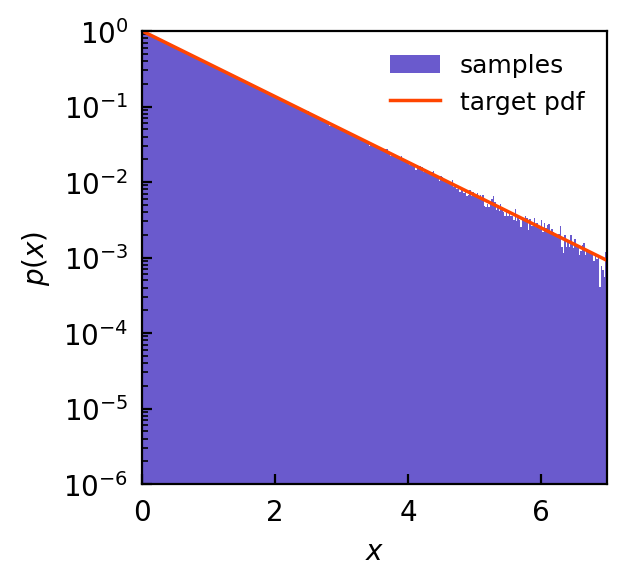

In [10]:
%matplotlib inline
plot_prettier()

plot_pdf(xexp, func=exp_pdf, args=[beta], xlims=[0,7], ylims=[1.e-6,1], ylog=True, 
         bins='auto', xlabel=r'$x$', ylabel=r'$p(x)$', figsize=3)

## <font color='blue'>Not all cdf's are algebraically invertable: can we use ITS in this case?</blue>

###  <font color='blue'>Gaussian pdf</font>

Here is a simple illustration of sampling a one-dimensional Gaussian pdf with the mean $\mu$ and standard deviation $\sigma$.
This is a test! In practice, there is no good reason to apply MCMC in 1d because it is by far not the most efficient method. This is done here for illustration and we will consider sampling higher-dimensional distributions later. 


$$p_G(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\,\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$

## <font color='blue'>Sampling special case pdfs: drawing Gaussian random numbers and distributions symmetric around zero</blue>

The Gaussian numbers can be drawn using the inverse transform, but this is computationally expensive due to a relatively complicated cdf of the Gaussian distribution (error function). Thus, a more efficient method is usually used: most commonly used is the <a href="https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform">Box-Mueller method.</a>. 

If $u_1$ and $u_2$ are uniformly distributed random numbers in the interval $[0,1)$, the following two numbers are drawn from the Gaussian pdf of zero mean and variance $\sigma^2=1$:


$$g_1=\sqrt{-2\ln u_1}\cos 2\pi u_2;\ \ \ g_2=\sqrt{-2\ln u_1}\sin 2\pi u_2 $$


If we want Gaussian numbers that sample Gaussian pdf with a given mean $\mu$ and standard deviation $\sigma$, we can rescale the above numbers as (where $g$ is either $g_1$ or $g_2$):

$$\tilde{g}=\mu + \sigma\,g$$


Let's check this empirically. 

The method is named after George Edward Pelham Box and Mervin Edgar Muller, who <a href="https://projecteuclid.org/euclid.aoms/1177706645">proposed it in 1958</a>, although the method was previously developed by Raymond E. A. C. Paley and Norbert Wiener in 1934.

In [11]:
# generate two vectors of nr pseudo-random numbers uniformly distributed in [0,1] (default)
nr = 100000
u1 = np.random.uniform(size=nr)
u2 = np.random.uniform(size=nr)

# transform uniformly distributed numbers in u1 and u2 into Gaussian pdf samples
mu, sigma = 10, 10 
g1 = mu + sigma*np.sqrt(-2.*np.log(u1)) * np.cos(2.*np.pi*u2)
# g2 will stay with mu=0 and sigma=1
g2 = np.sqrt(-2.*np.log(u1)) * np.sin(2.*np.pi*u2)

In [12]:
def gaussian_pdf(x, mu=0., sigma=1.):
    """
    returns value of the Gaussian pdf with input mu, sigma for input x 

    Parameters:
    -----------
    x:     a float or a 1d numpy array of floats, input x value(s)
    mu:    a float, mean of the Gaussian (default 0)
    sigma: a float, st. deviation of the Gaussian (default 1.0)
    
    Returns:
    --------
    
    g(x): a float or a 1d numpy array of floats, 
          value(s) of the Gaussian pdf for input x value(s)
    """
    assert(sigma !=0.)

    return 1./np.sqrt(2.*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

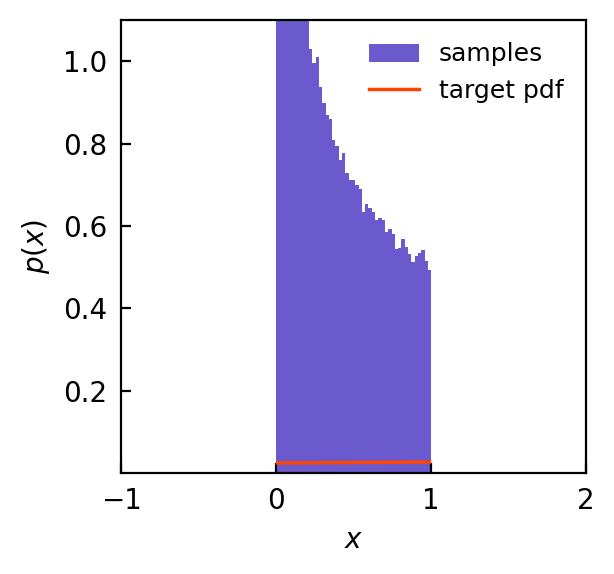

In [13]:

plot_pdf(u1**2, func=gaussian_pdf, args=[10,10], xlims=[-1,2],
         ylims=[1.e-6,1.1], ylog=False, 
         bins='auto', xlabel=r'$x$', ylabel=r'$p(x)$', figsize=3)

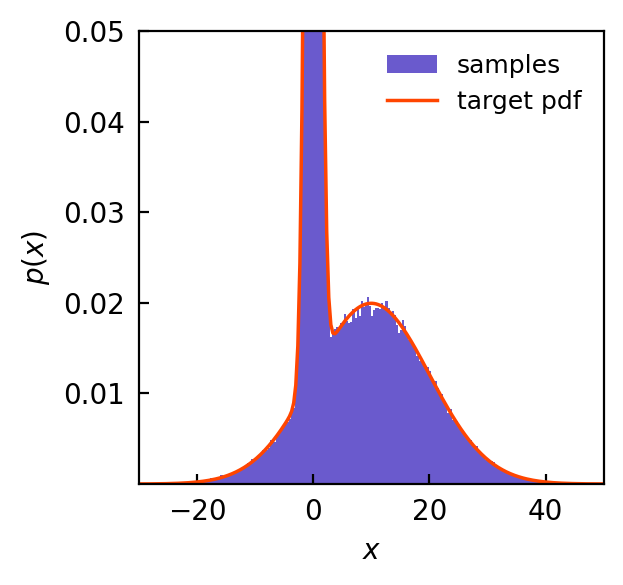

In [14]:
def gauss2(x, mu, sigma):
    return 0.5*(gaussian_pdf(x, mu, sigma) + gaussian_pdf(x, 10+mu, 10*sigma))

g = np.random.normal(size=nr)
mu, sigma = 0., 1.
plot_pdf(np.hstack((g1,g2)), func=gauss2, args=[mu, sigma], xlims=[-30,50],
         ylims=[1.e-6,0.05], ylog=False, 
         bins='auto', xlabel=r'$x$', ylabel=r'$p(x)$', figsize=3)

Using Gaussian samples you can also create samples of some other distributions, such as $\chi^2$ and Student $t$ distribution.

When a large number of samples is needed and computational time is an issue, there is a more efficient <a href="https://en.wikipedia.org/wiki/Ziggurat_algorithm">*ziggurat algorithm*</a> of Marsaglia & Tang (2000) to sample symmetric unimodal distributions such as Gaussian and Student $t$. However, this algorithm won't work for assymetric distributions such as $\chi^2$.  

C:\Users\akrav\Documents\Classes\a211s22\codes\plotting.py:322: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


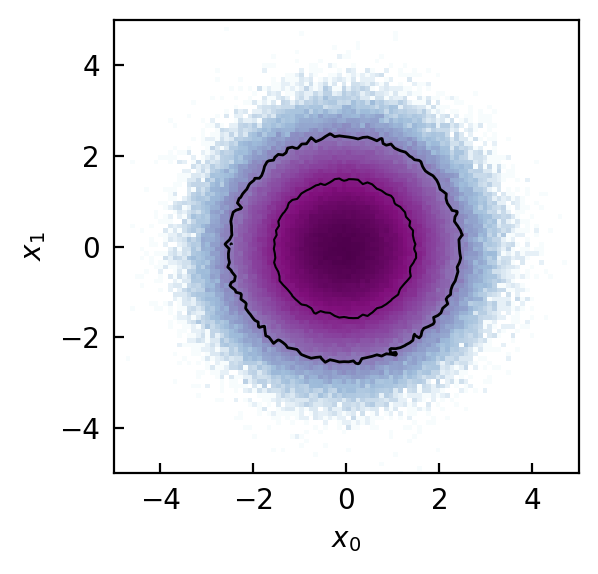

In [15]:
# define levels to plot (fractions of samples enclosed by the contours)
conflevs = [0.6827, 0.9545]

nr = 1000000
g1 = np.random.normal(size=nr)
g2 = np.random.normal(size=nr) 

# plot distribution of random numbers as a 2d histogram
plot_2d_dist(g1, g2, xlim=[-5,5], ylim =[-5,5], nxbins=100, nybins=100, 
             clevs=conflevs,  xlabel='$x_0$', ylabel='$x_1$', figsize=(3,3))

# <font color='blue'>ASTR 21100/31200 </font>

# <font color='blue'>"Computational Techniques in Astrophysics"</font>

# <font color='blue'>Sampling higher dimensional distributions</font>


In [16]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plotting import plot_prettier
plot_prettier()

### <font color='blue'>A generic way to sample multi-dimensional distributions: Markov Chain Monte Carlo (MCMC)</font> 

In a seminal 1953 paper <a href="http://adsabs.harvard.edu/abs/1953JChPh..21.1087M">"*Equation of State Calculations by Fast Computing Machines*"</a>, by Nicholas Metropolis, Arianna Rosenbluth, Marshall Rosenbluth, Augusta Teller, and Edward Teller, used a novel method to produce samples in a Monte Carlo model of a
system of interacting particles approaching thermodynamic equilibrium. 

Despite the highly specific application of the original paper, the approach they used is generic and can be used to sample 
pdfs in any number of dimensions, even when normalization of the pdf is not known and cannot be easily computed.
This approach, developed and formalized further in the subsequent decades (particularly by W.K. Hastings in 1970) is now widely known as the MCMC. 

<center>
<img width=1200 src="https://astro.uchicago.edu/~andrey/classes/a211/img/metropolis_etal.png"></img>
</center>

The MCMC algorithm is included in the <a href="https://www.computer.org/csdl/mags/cs/2000/01/c1022.html">top ten algorithms of the 20th century.</a> (under the name "Metropolis Algorithm for Monte Carlo"). 

<center>
<img width=500 src="https://astro.uchicago.edu/~andrey/classes/a211/img/nicholas_metropolis_maniac_board.jpg"></img>

<center>Nick Metropolis (UChicago, BSc 1937, PhD 1941)</center>

<center>
    
### <font color='blue'>Generalizations by Canadian statistician Keith Hastings in 1970</font> 


<p>
<center>
    <img width=200 src="http://probability.ca/hastings/hastingsphoto.jpg"></img>
    
<p>
    
<center>
    <img width=900 src="http://astro.uchicago.edu/~andrey/classes/a211/img/hastings70.png"></img>

### <font color='blue'>What's in the name?</font> 

"*Monte Carlo*" sampling is done using random steps in the variables of the distribution (i.e. done using Monte Carlo approach).  "*Markov Chain*" is in the name because sampling algorithm during a step explicitly depends only on the samples from the previous step, which makes the produced sequence of samples a so-called *Markov random process.*

***Note:*** The origin of the exact term "Markov Chain Monte Carlo" is mysterious. It was not used in the original 1953 Metropolis et al. paper, while <a href="https://academic.oup.com/biomet/article/57/1/97/284580">W.K.Hastings's 1970 paper</a> that generalized the algorithm but used the term "Monte Carlo sampling with Markov Chains".

The <a href="https://books.google.com/ngrams/graph?content=markov+chain+monte+carlo&year_start=1953&year_end=2019&corpus=26&smoothing=3&direct_url=t1%3B%2Cmarkov%20chain%20monte%20carlo%3B%2Cc0">Google Ngram plot</a> for "Markov Chain Monte Carlo" shows that it's been in significant use only since 1985. 

###  <font color='blue'>The MCMC algorithm to draw random samples from $\pi(\vec{x})$</font>

Given an initial sample $\vec{x}_i$ drawn from $\pi(\vec{x})$ we generate next sample drawn from the same pdf using the following steps (arranged in a loop):

1. ***Step (evolution) proposal.*** Propose a new trial sample $\vec{x}^\prime$ by drawing it from whatever pdf $p_{\rm try}(\vec{x}^\prime\vert \vec{x}_i)$ we deem convenient, as long as $p_{\rm try}(\vec{x}^\prime\vert \vec{x}_i)=p_{\rm try}(\vec{x}_i\vert \vec{x}^\prime)$.

2. ***Acceptance or rejection of the proposed step.*** 
   For $\eta=\pi(\vec{x}^\prime)/\pi(\vec{x})$
   
   if $\eta \geq 1$, accept the proposed sample: $\vec{x}_{i+1}=\vec{x}^\prime$. 

   else, draw a random number, $u$, uniformly distributed in $[0,1)$ and assign the next sample in the sequence as
   
    $$\vec{x}_{i+1}=
 \begin{cases}
            \vec{x}^\prime, &  \mathrm{if}\ \ \ u<\eta,\\
            \vec{x}_i, &    \mathrm{otherwise\ },
    \end{cases}
$$

3. Check whether stopping criteria for generating a sequence are satisfied (more on these later). If not, go to step 1 to draw another sample.
    
    
A sequence of samples drawn using MCMC algorithm is usually called ***chain*** in the jargon of this method. 

[A visual illustration.](https://github.com/chi-feng/mcmc-demo)

Metropolis algorithm is simple enough to be <a href="https://twitter.com/hashtag/shortestmcmc?src=hash">twitted</a> (and this was done for an old much shorter character limit):

In [17]:
import numpy as n
r=n.random;f=lambda p:-n.sum(p*p)/2;x=0
for d in r.randn(5000): x=x+d if f(x+d)-f(x)>n.log(r.rand()) else x

###  <font color='blue'>Gaussian pdf and its natural log.</font>

Here is a simple illustration of sampling a one-dimensional Gaussian pdf with the mean $\mu$ and standard deviation $\sigma$.
This is a test! In practice, there is no good reason to apply MCMC in 1d because it is by far not the most efficient method. This is done here for illustration and we will consider sampling higher-dimensional distributions later. 


$$p_G(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\,\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$

what we actually sample is $\ln p_G$


$$\ln p_G(x) = -\frac{1}{2}\,\ln\left(2\pi\sigma^2\right) - \frac{1}{2}\,\frac{(x-\mu)^2}{\sigma^2}=-\frac{1}{2}\,\left[\ln\left(2\pi\sigma^2\right) + \frac{(x-\mu)^2}{\sigma^2}\right]$$

In [18]:
def gauss1d_pdf(x, mean, sigma):
    assert(sigma>0)
    return np.exp(-0.5*((x-mean)/sigma)**2) / (np.sqrt(2*np.pi)*sigma)

def lngauss1d(x, mean, sigma):
    '''Gaussian pdf with the mean, sigma evaluated at x'''
    return -0.5*(((x-mean)/sigma)**2 + np.log(2.*np.pi*sigma**2))

In [19]:
import numpy as n
r=n.random;f=lambda p:-n.sum(p*p)/2;x=0
chain = []
for d in r.randn(5000): 
    x=x+d if f(x+d)-f(x)>n.log(r.rand()) else x
    chain.append(x)

In [20]:
def plot_pdf(xr, func=None, args=None, label='ITS method', 
             ylog=True,
             bins = 50, xlims=[], ylims=[], figsize=3):
    """
    wrapper convenience function for plotting  histogram of a sequence of floats xr
    and comparing it to a theoretical distribution given by func
    
    Parameters:
    -----------
    xr: 1d numpy array of floats, values in the sequence to plot
    func: Python function object handle
    args: list of arguments to the function
    other parameters are used for plotting
    """
    plt.figure(figsize=(figsize,figsize))
    if ylog: plt.yscale('log') # plot y-values on a logarithmic scale
    if ylims: plt.ylim(ylims) # set axis limits 
    if xlims: plt.xlim(xlims)
    # compute histogram values 
    hist, bins, patches = plt.hist(list(xr), density=True, bins=bins, label=label)
    binc = 0.5*(bins[1:] + bins[:-1]) # compute bin centers
    plt.plot(binc, func(binc, *args), lw=1.25, c='orangered', label='target pdf')
    plt.ylabel(r'$p(x)$') # label axis 
    plt.xlabel(r'$x$')
    plt.legend(loc='best', frameon=False, fontsize=3*figsize)
    plt.show()

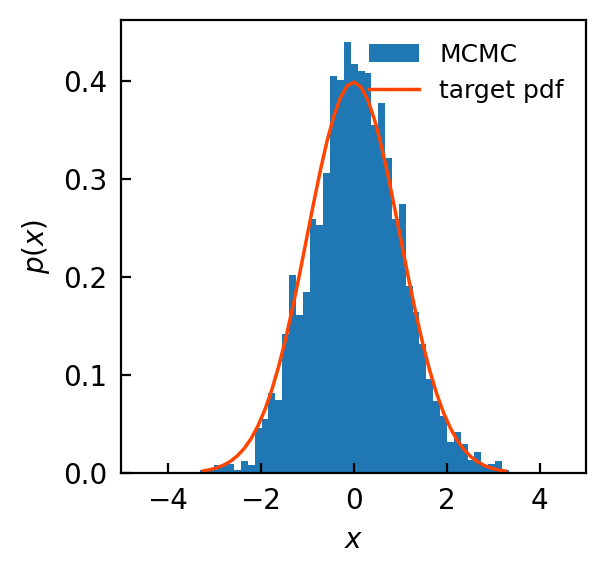

In [21]:

plot_pdf(chain, func=gauss1d_pdf, args=[0,1], xlims=[-5,5], ylog=False, bins='auto', label='MCMC')

In [22]:
def mcmc_simple(x0, nsteps, step, logpdf, *args):
    x = x0 
    nparams = np.size(x0) # dimensionality of distribution we are sampling
    fnow = logpdf(x, *args) # compute current value of ln(pdf)
    
    chain = [] # initialize chain list
    for nstep in range(nsteps):
        xtry = x + step * np.random.uniform(-1, 1., size=nparams)
        ftry = logpdf(xtry, *args)
        if ftry > fnow:
            x = xtry
            fnow = ftry
        else: 
            u = np.random.uniform()
            if np.log(u) < ftry - fnow:
                x = xtry
                fnow = ftry
                
        chain.append(x)
        
    return chain

###  <font color='blue'>A simple illustration of MCMC sampling.</font>

Here is a simple illustration of sampling a one-dimensional Gaussian pdf with the mean $\mu$ and standard deviation $\sigma$.
This is a test! In practice, there is no good reason to apply MCMC in 1d because it is by far not the most efficient method. This is done here for illustration and we will consider sampling higher-dimensional distributions later. 


$$p_G(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\,\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$

what we actually sample is $\ln p_G$


$$\ln p_G(x) = -\frac{1}{2}\,\ln\left(2\pi\sigma^2\right) - \frac{1}{2}\,\frac{(x-\mu)^2}{\sigma^2}=-\frac{1}{2}\,\left[\ln\left(2\pi\sigma^2\right) + \frac{(x-\mu)^2}{\sigma^2}\right]$$

In [23]:
def gauss1d_pdf(x, mean, sigma):
    assert(sigma>0)
    return np.exp(-0.5*((x-mean)/sigma)**2) / (np.sqrt(2*np.pi)*sigma)

def lngauss1d(x, mean, sigma):
    '''Gaussian pdf with the mean, sigma evaluated at x'''
    return -0.5*(((x-mean)/sigma)**2 + np.log(2.*np.pi*sigma**2))

In [24]:
x0 = np.array([10.])
nsteps, step = 10000, 1.
args= [0.,1.]
chain = mcmc_simple(x0, nsteps, step, lngauss1d, *args)

# compute the fraction of unique elements of the chain (fraction of trial steps that were accepted)
faccept = np.shape(np.unique(chain))[0] / nsteps
print(f'finished {nsteps:d} steps with acceptance ratio = {faccept:.4f}')

# this flattens the chain which was obtained as a list of arrays formally
chain = np.array(chain, dtype='object').flatten().astype('object')

finished 10000 steps with acceptance ratio = 0.8060


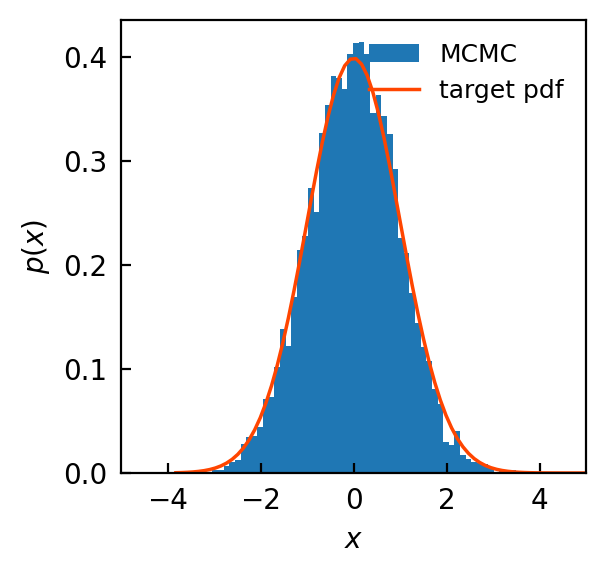

In [25]:

plot_pdf(chain, func=gauss1d_pdf, args=[0,1], xlims=[-5,5], ylog=False, bins='auto', label='MCMC')

The output tells us that $80\%$ of proposed trial steps were accepted. Note that this means that $20\%$ of the chain elements are duplicates, because sample location was duplicated if proposed step was not accepted. This is one of the reasons this is not the best method to use in 1d, where we can easily produce a sequence of Gaussian numbers using Box-Muller method with no duplicates. 

### <font color='blue'>The cornerstone of MCMC sampling: detailed balance condition</font>

The number density of pdf samples at a given point $\vec{x}$ is equal to $\pi(\vec{x})$ by definition. Thus, the flux balance  can be achieved in the MCMC if we draw successive samples in such a way that transition probabilities, $p_{\rm tr}$, from $x_i$ to $x_{i+1}$ and from $x_{i+1}$ to $x_i$ satisfy:

$$\pi(\vec{x}_i)\,p_{\rm tr}(\vec{x}_{i+1}\vert\vec{x}_i)=\pi(\vec{x}_{i+1})\,p_{\rm tr}(\vec{x}_{i}\vert\vec{x}_{i+1}).$$ 

This is called *the detailed balance condition.* 

### <font color='blue'> Step acceptance probability distribution function</font>

The detailed balance condition after this cancellation is:

$$\pi(\vec{x})\,p_{\rm try}(\vec{x}^\prime\vert \vec{x})\,p_{\rm acc}(\vec{x}^\prime\vert \vec{x})=\pi(\vec{x}^\prime)\,p_{\rm try}(\vec{x}\vert \vec{x}^\prime)\,p_{\rm acc}(\vec{x}\vert \vec{x}^\prime).$$

so that 
$$p_{\rm acc}(\vec{x}^\prime\vert \vec{x})= \frac{\pi(\vec{x}^\prime)}{\pi(\vec{x})}\,p_{\rm acc}(\vec{x}\vert \vec{x}^\prime).\ \ \ \ \ \ \ \ (\star)$$

Let's assume that $p_{\rm acc}(\vec{x}\vert \vec{x}^\prime)=1$ if $\pi(\vec{x}^\prime)/\pi(\vec{x}) \geq 1$, i.e., *when the proposed step increases pdf, it is always accepted.*

When the proposed step decreases pdf, $\pi(\vec{x}^\prime)/\pi(\vec{x}) < 1$, accept the step with probability $p_{\rm acc}(\vec{x}\vert \vec{x}^\prime)=\pi(\vec{x}^\prime)/\pi(\vec{x})$. 

Then, it is easy to check that the condition $(\star)$ is satisfied. 

###  <font color='blue'>Acceptance probability "unpacked"</font>

What this means is that we on average should accept a fraction of 
$$
p_{\rm acc}(\vec{x}^\prime\vert\vec{x})=\min\left[\frac{\pi(\vec{x}^\prime)}{\pi(\vec{x})},1.0\right].
$$
 of proposed steps, and "reject" the rest.
 
***Rejection of a proposed step means that the next sample in the sequence is simply a duplicate of the sample at the current location $\vec{x}$***: $\vec{x}^\prime =\vec{x}$. We must add this duplicate to the sequence, because otherwise detailed balance condition is broken and we won't sample pdf correctly. 

In [26]:
def mcmc_gauss1d(x0=np.array([10.]), nsteps=100000, args=[0.,1.], step=1.):
    """
    wrapper function to do MCMC sampling of 1d Gaussian
    """
    chain = mcmc_simple(x0, nsteps, step, lngauss1d, *args)

    # compute the fraction of unique elements of the chain (fraction of trial steps that were accepted)
    faccept = np.shape(np.unique(chain))[0] / nsteps
    print('finished {:d} steps with acceptance ratio = {:.4f}'.format(nsteps, faccept))

    # this flattens the chain which was obtained as a list of arrays formally
    # and this can cause issues
    return np.array(chain, dtype='object').flatten().astype('object')

finished 1000000 steps with acceptance ratio = 0.8041


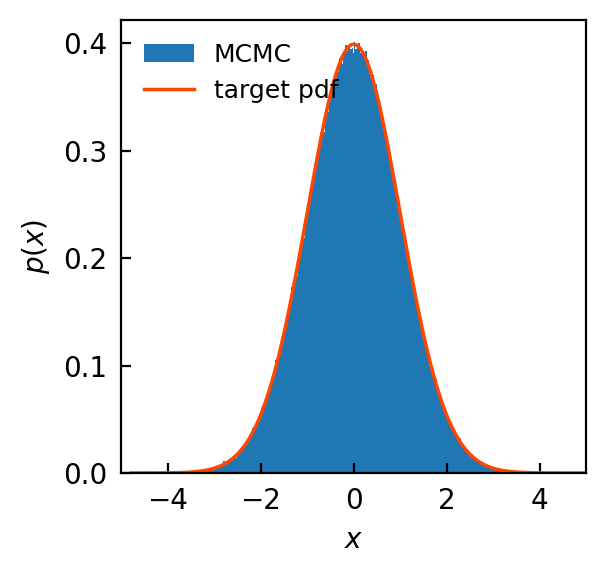

In [27]:
chain = mcmc_gauss1d(step=1, nsteps=1000000)

plot_pdf(chain, func=gauss1d_pdf, args=[0,1], xlims=[-5,5], ylog=False, bins='auto', label='MCMC')

Now we will histogram MCMC samples and compare them to Gaussian pdf. 

###  <font color='blue'>Trace plots: looking for a "hairy caterpillar"</font>

Plots of values of sampled numbers as a function of step number are called ***trace plots*** in the MCMC jargon. The trace plot for the chain above is shown below

In [28]:
def plot_trace(x, figsize=3):
    try:
        nsteps, ndims = np.shape(x)[0], np.shape(x)[1]
    except:
        nsteps, ndims = np.shape(x)[0], 1
        
    plt.figure(figsize=(figsize,figsize))
    for d in range(ndims):
        if ndims == 1:
            plt.plot(np.arange(0,nsteps,1), x, lw=0.5, c='darkslateblue', label='d={:d}'.format(d))
        else:
            plt.plot(np.arange(0,nsteps), x[:,d], lw=0.5, c='darkslateblue', label='d={:d}'.format(d))
    plt.ylabel(r'$x$') # label axis 
    plt.xlabel(r'step number')
    plt.show()    

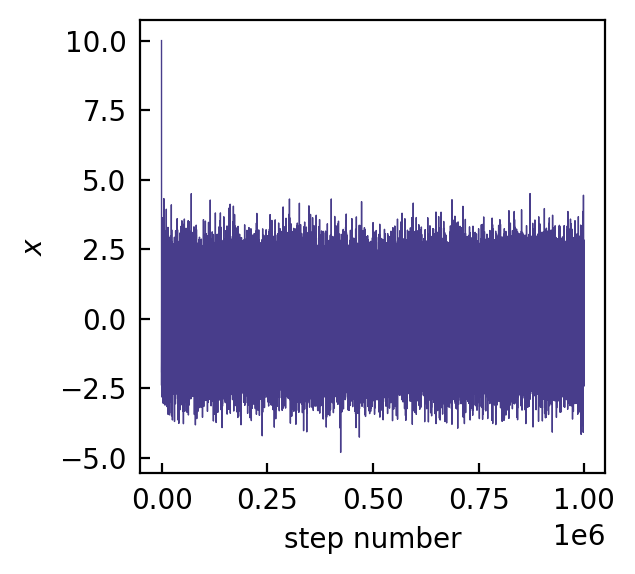

In [29]:
plot_trace(chain)

We can see the sequence of first numbers that followed the initial value of $x_0=10$, which are very unlike for the Gaussian with zero mean and $\sigma=1$. We can see, for example, that in the remaining chain there are no values with $\vert x\vert>5$ that were realized after this initial sequence. This initial sequence of unlikely numbers is called *burn-in* of this chain. Usualy an effort is made to remove them.

The rest of the chain looks pretty good: the numbers bounce around zero sampling different parts of the distribution. 

The trace plot like this looks like a "hairy caterpillar" and an MCMC chain that looks like this likely sampled the distribution well. In the MCMC jargon it is said that the chain is ***converged.***

If we look at the first 1000 steps, this trace no longer looks like a "hairy caterpillar". 

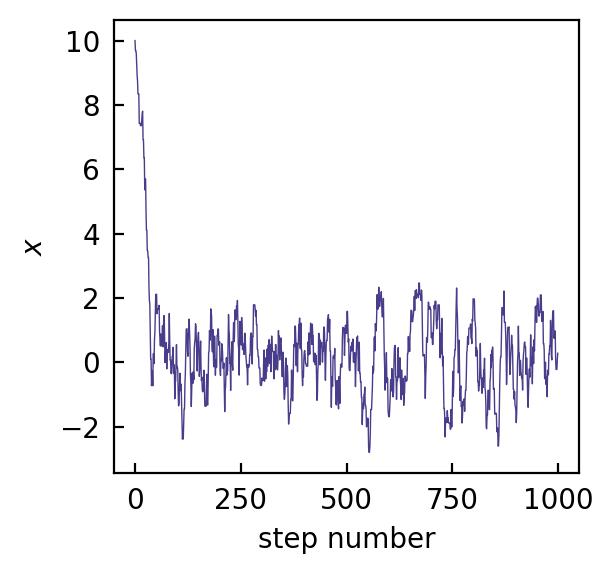

In [30]:
plot_trace(chain[:1000])

A trace like this indicates that the chain has not "converged" yet. This means that distribution is not sampled well with this number of MCMC steps. We can see it in the histogram comparison:

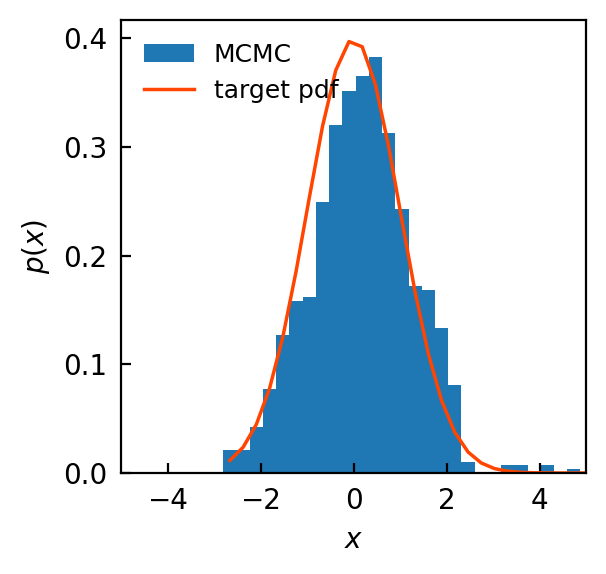

In [31]:
plot_pdf(chain[:1000], func=gauss1d_pdf, args=[0,1], xlims=[-5,5], ylog=False, bins='auto', label='MCMC')

### <font color='darkblue'>A more difficult/realistic case: sampling of the Rosenbrock "banana" distribution

Rosenbrock distribution is described by the following equation in 2D (i.e. for two parameters $x$ and $y$): 

$$p_{\rm R}(x_1,x_2) = \exp\left[-c(b(x_2-x_1^2)^2 -(a-x_1)^2)\right], $$
    

which is often used for testing optimization and sampling algorithms, particularly with $a=1$, $b=100$ most often used. It has a global maximum at $(x_1,x_2)=(a,a^2)$ at which $p_{\rm R}(x_1,x_2)=1$, as is clear from the equation above. 

In [32]:
def lnrosenbrock(x, a=1., b=100., c=1.):
    """\ln of the Rosenbrock "banana" distribution
    x is a numpy vector of points in 2 or more dimensional space
    """
    return -c * sum(b*(x[1:]-x[:-1]**2.0)**2.0 + (a-x[:-1])**2.0)

In [33]:
# define a grid of x and y for calculations and plotting
xmin, xmax, ng = -10, 10, 100
ymin, ymax = -50, 100
x1 = np.linspace(xmin, xmax, ng)
x2 = np.linspace(ymin, ymax, ng)

# generate a 2d grid of x and y points
x1g, x2g = np.meshgrid(x1, x2)

# form a single array of 2D vectors 
x = np.vstack([x1g.ravel(), x2g.ravel()])

# compute the Rosenbrock function and reshape the output into ng x ng grid for plotting
rg = lnrosenbrock(x).reshape((ng,ng))

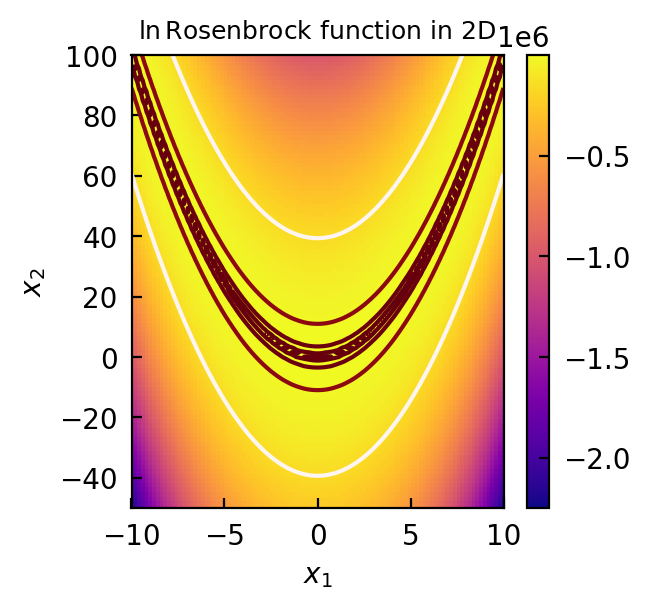

In [34]:
#xg, yg are 2D "grids" of x and y generated by meshgrid
# rg is 2D array with values of the Rosenbrock function for xg-yg grid

# contour levels; fairly arbitrary choice here, just to show the range of function values.
levs = rg.max() / np.exp(-0.15*np.arange(5,10)**2)

plot_color_map(x1g, x2g, rg, xlim=[xmin,xmax], ylim=[ymin,ymax], 
                   xlabel = r'$x_1$', ylabel = '$x_2$', cmap='plasma', colorbar=True, 
                   plot_title=r'$\rm \ln Rosenbrock\ function\ in\ 2D$', contours=True, contcmap='Reds', 
                   levels = levs[::-1], figsize=3.0)

In [35]:
ndim = 2 # dimensionality of the distribution
nsteps = 1000000 # number of steps to make
x0 = np.random.rand(ndim) # initial position
step = 1. # step size

args = [] # parameters of the Gaussian
# run simple MCMC 
chain = np.asarray(mcmc_simple(x0, nsteps, step, lnrosenbrock, *args))

C:\Users\akrav\Documents\Classes\a211s22\codes\plotting.py:322: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


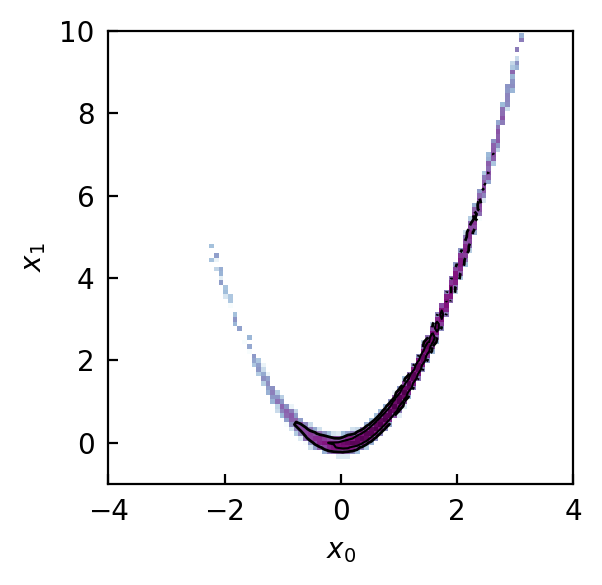

In [36]:
# define levels to plot (fractions of samples enclosed by the contours)
conflevs = [0.6827, 0.9545] # 1-sigma and 2-sigma contours

# plot distribution of MCMC samples as a 2d histogram with contours
# in the $x_0-x_1$ plane, where $x_0$ and $x_1$ are 2 Gaussian variables
# chain[:,0], chain[:,1] access sample values of two variables separately
plot_2d_dist(chain[:,0], chain[:,1], xlim=[-4,4], ylim =[-1,10], nxbins=100, nybins=100, 
             clevs=conflevs,  xlabel='$x_0$', ylabel='$x_1$', figsize=(3,3))

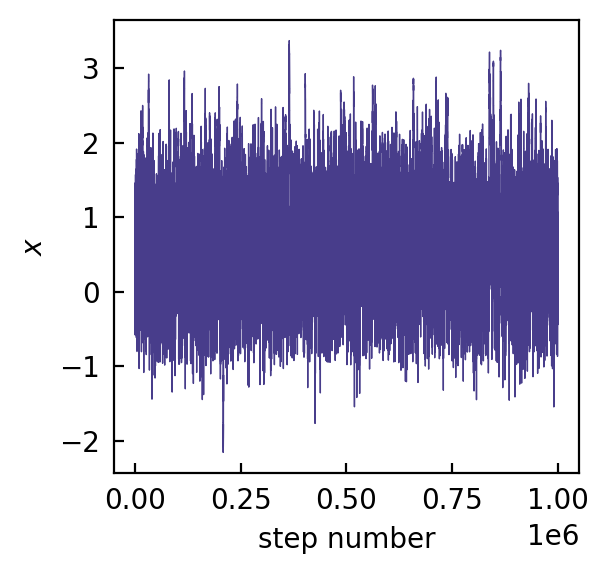

In [37]:
plot_trace(chain[:,0])

### <font color='blue'>MCMC convergence</font>

When can we be 100% certain that the chain samples distribution well and is *converged*?
    
This question does not have an exact answer, but there are several heuristic *convergence criteria* that are used. That is, chains are increased not for a fixed number of steps, but until a set of convergence criteria are satisfied.

For example, if we have some accuracy in mind and have a good idea how many *independent* samples $N_{\rm sample}$ we want, we can make estimates of autocorrelation time $t_{\rm corr}$ as the MCMC runs (say with some cadence like every 1000th step) and stop when $N_{\rm sample}>n_{\rm step}/t_{\rm corr}$. The fractional accuracy with which statistics such as the mean of the sampled distribution can be determined is $\sim 1/\sqrt{N_{\rm sample}}$ because quantities estimated from discrete samples are subject to the Poisson "shot noise" that scales with $N_{\rm sample}$ in this way. So if we want quantities with 1\% accuracy, we need at least $N_{\rm sample}\sim 10^4$ *independent* samples. If we want accuracy of $0.1\%$ we need $N_{\rm sample}\sim 10^6$. 
    
    
Note also that for multi-d sampling $t_{\rm corr}$ should be estimated for each dimension separately because distribution that we are sampling can behave very differently along different dimensions. We should keep track of the longest $t_{\rm corr}$ and use it when estimating $N_{\rm sample}$. 


###  <font color='blue'>Take-home points:</font>
    
* Proper application of MCMC requires some care. One should also be on the lookout for spurious results.
    
* At the very least, you should examine trace plots. The best practice is to use auto-correlation time or some other convergence criterion. 

* None of these issues are a show-stopper, however. The method is powerful, albeit often not very efficient, and is the only game in town in many dimensions. 
    
    
* The standard Metropolis MCMC algorithm will have difficulties sampling pdf with narrow "ridges" along certain dimensions. See, for example, example <a href="http://chi-feng.github.io/mcmc-demo/app.html?algorithm=RandomWalkMH&target=banana">here</a>

### <font color='blue'>Ensemble MCMC samplers</font>

In the examples so far, we start MCMC sampling from a single sample. However, given that we can do vector operations with NumPy, we can initialize some number of samples and construct multiple MCMC chains at the same time. 

This approach is called *ensemble sampling* and is often used in MCMC methods. The individual chains are called *ensemble walkers* or just *walkers* in the MCMC jargon (because sampling can be thought of as a walk in multi-d space).

    
<center>
<img width=500 src="https://astrobites.com/wp-content/uploads/2012/02/stretchmove-300x204.png"></img>

### <font color='blue'>Affine-invariant ensemble sampler of Goodman & Weare (2010)</font>
    

One of the issues with the simple MCMC algorithm is the need to choose step size. In the examples above you saw that quality of sampling can change dramatically depending on step size. 
For high-dimensional distributions steps usually should be different in different dimensions for good convergence and it is not clear what they should be *a priori*. 
    
<a href="http://msp.org/camcos/2010/5-1/p04.xhtml">Goodman & Weare (2010)</a> have developed a simple MCMC sampling algorithm, which is efficient for distributions that exhibit strong degeneracies (narrow ridges in the pdf) or pdfs with multiple peaks. 

In this method, one initializes a number of walkers (this is why it is called *ensemble sampler*) distributed with a multi-variate Gaussian probability around a starting point. Then MCMC chain is constructed in a way similar to the Metropolis algorithm: proposing a step, estimating probability at the proposed location, and then accepting the step with an acceptance probability. The difference from the Metropolis MCMC is in the way the step is proposed and how acceptance probability is calculated:

* In this method a step from location $\vec{x}_i$ to $\vec{x}_{i+1}$ is proposed as a *stretch* move: $\vec{x}_{i}^{\prime}=\vec{x}_{j}+z_r(\vec{x}_{i}-\vec{x}_j)$, where $\vec{x}_{j}$ is the current location of *another* randomly chosen walker (but not the current one we are updating) and $z_r$ is  a random number drawn from the pdf $g(z)= 1/\sqrt{z}$ for $z\in[1/a,a]$ interval and $g(z)=0$ outside this interval, where GW10 suggest $a=2$. 


* The proposed stretch move is then accepted with probability $p_{\rm acc}={\rm min}[1.0,z_r^{D-1}\pi(\vec{x}_i^{\prime})/\pi(\vec{x})]$, where $\pi$ is the target pdf the chain is supposed to sample and $D$ is the number of components of $\vec{x}$ (i.e., the number of dimensions of the pdf we are sampling; e.g., for the $D=2$ for a 2D Gaussian).  

### <font color='blue'>Why does GW10 sampling algorithm improve Metropolis MCMC?</font>

GW10 algorithm is nearly as simple as Metropolis MCMC, but is much more efficient in sampling distributions and producing good sample chains. Try to examine description of the algorithm above and think what features of the algorithm make it efficient. 

###  <font color='blue'>GW10 algorithm is implemented in the emcee MCMC package</font>

GW10 algorithm is implemented in the most popular MCMC package in astronomy <a href="https://emcee.readthedocs.io/en/v2.2.1/"><tt>emcee</tt></a>. 

To install it, do

    pip install emcee
    
in the Anaconda command prompt or linux/MacOS shell.

In [38]:
import emcee

ndim, nwalkers, nsteps = 1, 10, 50000

# initialize walkers
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

# initialize MCMC sample
sampler = emcee.EnsembleSampler(nwalkers, ndim, lngauss1d, args=[0.,1.])

# run for a given nsteps
dummy = sampler.run_mcmc(p0, nsteps)

# get chain
chain = sampler.chain

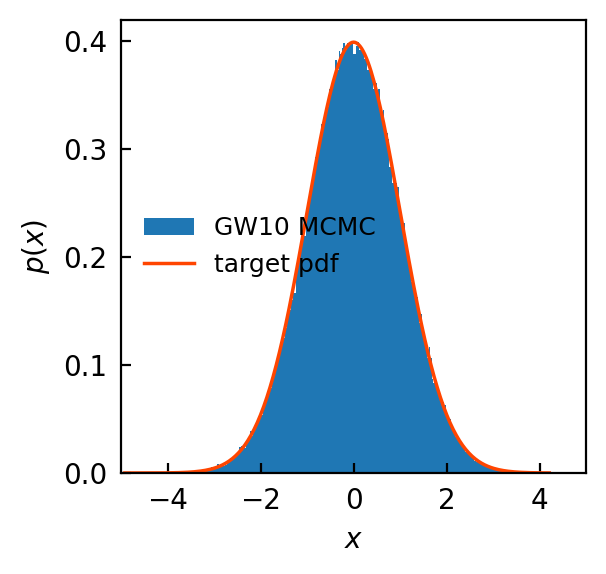

In [39]:
plot_pdf(chain.flatten(), func=gauss1d_pdf, args=[0,1], xlims=[-5,5], ylog=False, bins='auto', label='GW10 MCMC')

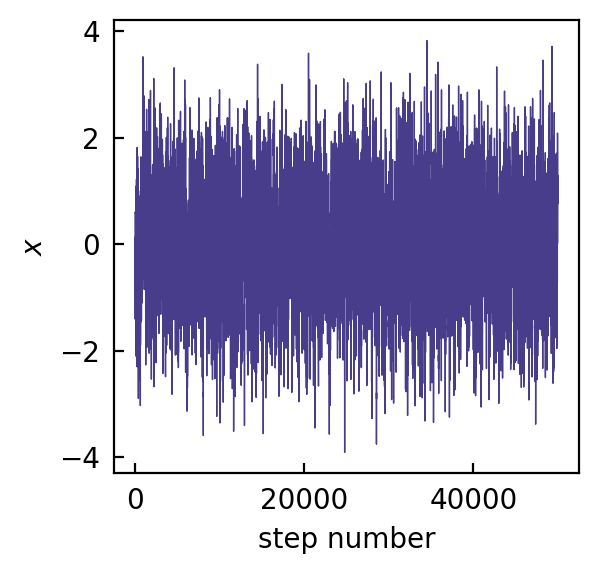

In [40]:
# plot trace of a single walker

plot_trace(chain[1,:])

###  <font color='blue'>Sample $\ln$ of Rosenbrock pdf with GW10 algorithm</font>


In [41]:
import emcee

ndim, nwalkers, nsteps = 2, 50, 50000

# initialize walkers
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

# initialize MCMC sample
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnrosenbrock, args=[])

# run for a given nsteps
dummy = sampler.run_mcmc(p0, nsteps)

# get chain
chaingw = sampler.chain

C:\Users\akrav\Documents\Classes\a211s22\codes\plotting.py:322: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


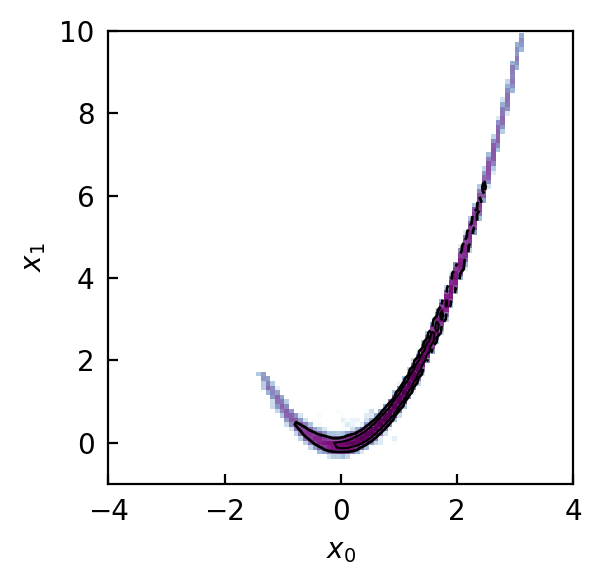

In [42]:
# define levels to plot (fractions of samples enclosed by the contours)
conflevs = [0.6827, 0.9545] # 1-sigma and 2-sigma contours

x = chaingw[:,:,0].flatten()
y = chaingw[:,:,1].flatten()

# plot distribution of MCMC samples as a 2d histogram with contours
# in the $x_0-x_1$ plane, where $x_0$ and $x_1$ are 2 Gaussian variables
# chain[:,0], chain[:,1] access sample values of two variables separately
plot_2d_dist(x, y, xlim=[-4,4], ylim =[-1,10], nxbins=100, nybins=100, 
             clevs=conflevs,  xlabel='$x_0$', ylabel='$x_1$', figsize=(3,3))

### Recommended

* Illustrative <a href="http://chi-feng.github.io/mcmc-demo/">visualizations of MCMC methods at work</a>.